# Imports

In [1]:
import os
import pandas as pd
import sys
import numpy as np
from matplotlib import pyplot
import ipywidgets as widgets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import settings as project_settings

In [2]:
# If not installed matplotlib-venn uncomment next line

# !pip install matplotlib-venn
from matplotlib_venn import venn3, venn3_circles

In [3]:
# If you are working on Google Colab uncomment next 2 lines

# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
sns.set_style("darkgrid")

In [5]:
results_folder = project_settings.results_folder

In [6]:
export_folder = f'{results_folder}export_csv/'
multi_target_folder = 'multi_target_output/'
single_output_folder = 'single_output_models/'
algorithm_no = 0
algorithm_folder = f'alg_no_{algorithm_no}/'
venn_folder = f'{results_folder}venn_diagram/'
regressions_multi = ['nn/', 'decision_tree_max_depth=10_criterion=mae/', 'random_forest_n_estimators=20_max_depth=7_criterion=mae/']
regressions_single = ['nn/', 'decision_tree_max_depth=9_criterion=mae/', 'random_forest_n_estimators=10_max_depth=7_criterion=mae/']

In [7]:
shap_multi_nn_precision = []
shap_single_nn_precision = []
shap_multi_forest_precision = []
shap_single_forest_precision = []
shap_multi_tree_precision = []
shap_single_tree_precision = []
shap_multi_nn_log_precision = []
shap_single_nn_log_precision = []
shap_multi_forest_log_precision = []
shap_single_forest_log_precision = []
shap_multi_tree_log_precision = []
shap_single_tree_log_precision = []

In [8]:
shap_multi_alg_0 = []
shap_multi_alg_1 = []
shap_multi_alg_2 = []
shap_single_alg_0 = []
shap_single_alg_1 = []
shap_single_alg_2 = []

## Folder

In [9]:
multi_precision_folder = f'{venn_folder}{algorithm_folder}'
multi_log_precision_folder = f'{venn_folder}{algorithm_folder}'
single_precision_folder = f'{venn_folder}{algorithm_folder}'
single_log_precision_folder = f'{venn_folder}{algorithm_folder}'

In [10]:
alg_0_1_2_folder = f'{venn_folder}alg_no_0_1_2/'

In [11]:
os.makedirs(multi_precision_folder, exist_ok=True)
os.makedirs(multi_log_precision_folder, exist_ok=True)
os.makedirs(single_precision_folder, exist_ok=True)
os.makedirs(alg_0_1_2_folder, exist_ok=True)

## Files init

In [ ]:
regression_multi = 'nn/'
shap_multi_nn_precision_files = os.listdir(f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}precision/')
shap_multi_nn_log_files = os.listdir(f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}log_precision/')

In [ ]:
if len(shap_multi_nn_precision_files) != 50 and len(shap_multi_nn_log_files) != 50:
    raise Exception('Wrong number of files')

In [ ]:
regression_single = 'nn/'
shap_single_nn_precision_files = os.listdir(f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}precision/')
shap_single_nn_log_precision_files = os.listdir(f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}log_precision/')

In [ ]:
if len(shap_single_nn_log_precision_files) != 50 and len(shap_single_nn_log_precision_files) != 50:
    raise Exception('Wrong number of files')

In [15]:
regression_multi = 'decision_tree_max_depth=10_criterion=mae/'
shap_multi_tree_precision_files = os.listdir(f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}precision/')
shap_multi_tree_log_precision_files = os.listdir(f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}log_precision/')

In [ ]:
if len(shap_multi_tree_log_precision_files) != 50 and len(shap_multi_tree_precision_files) != 50:
    raise Exception('Wrong number of files')

In [ ]:
regression_single = 'decision_tree_max_depth=9_criterion=mae/'
shap_single_tree_precision_files = os.listdir(f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}precision/')
shap_single_tree_log_precision_files = os.listdir(f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}log_precision/')

In [ ]:
if len(shap_single_tree_log_precision_files) != 50 and len(shap_single_tree_precision_files) != 50:
    raise Exception('Wrong number of files')

In [ ]:
regression_multi = 'random_forest_n_estimators=20_max_depth=7_criterion=mae/'
shap_multi_forest_precision_files = os.listdir(f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}precision/')
shap_multi_forest_log_precision_files = os.listdir(f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}log_precision/')

In [ ]:
if len(shap_multi_forest_log_precision_files) != 50 and len(shap_multi_forest_precision_files) != 50:
    raise Exception('Wrong number of files')

In [ ]:
regression_single = 'random_forest_n_estimators=10_max_depth=7_criterion=mae/'
shap_single_forest_precision_files = os.listdir(f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}precision/')
shap_single_forest_log_precision_files = os.listdir(f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}log_precision/')

In [ ]:
if len(shap_single_forest_precision_files) != 50 and len(shap_single_forest_log_precision_files) != 50:
    raise Exception('Wrong number of files')

In [ ]:
regression_multi = 'random_forest_n_estimators=75_max_depth=25_criterion=mae/'
algorithm_folder = 'alg_no_0_1_2/'
shap_multi_forest_alg_0_files = os.listdir(f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}alg_0/')
shap_multi_forest_alg_1_files = os.listdir(f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}alg_1/')
shap_multi_forest_alg_2_files = os.listdir(f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}alg_2/')

In [ ]:
if len(shap_multi_forest_alg_0_files) != 50 and len(shap_multi_forest_alg_1_files) != 50 and len(shap_multi_forest_alg_2_files):
    raise Exception('Wrong number of files')

In [ ]:
regression_single = 'random_forest_n_estimators=25_max_depth=25_criterion=mae/'
algorithm_folder = 'alg_no_0_1_2/'
shap_single_forest_alg_0_files = os.listdir(f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}alg_0/')
shap_single_forest_alg_1_files = os.listdir(f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}alg_1/')
shap_single_forest_alg_2_files = os.listdir(f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}alg_2/')

In [ ]:
if len(shap_single_forest_alg_0_files) != 50 and len(shap_single_forest_alg_1_files) != 50 and len(shap_single_forest_alg_2_files):
    raise Exception('Wrong number of files')

## Array innit

## Alg 0_1_2

In [ ]:
algorithm_folder = 'alg_no_0_1_2/'
regression_multi = 'random_forest_n_estimators=75_max_depth=25_criterion=mae/'
shap_algorithm_level_folder_multi_precision_0 = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}alg_0/'
shap_algorithm_level_folder_multi_precision_1 = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}alg_1/'
shap_algorithm_level_folder_multi_precision_2 = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}alg_2/'

regression_single = 'random_forest_n_estimators=25_max_depth=25_criterion=mae/'
shap_algorithm_level_folder_single_precision_0 = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}alg_0/'
shap_algorithm_level_folder_single_precision_1 = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}alg_1/'
shap_algorithm_level_folder_single_precision_2 = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}alg_2/'

In [ ]:
# Multi Precision Shaps Alg 0
for file in shap_multi_forest_alg_0_files:
  shap_values_multi_alg_0 = pd.read_csv(shap_algorithm_level_folder_multi_precision_0 + file)
  shap_multi_alg_0.append(shap_values_multi_alg_0)

In [ ]:
# Multi Precision Shaps Alg 1
for file in shap_multi_forest_alg_1_files:
  shap_values_multi_alg_1 = pd.read_csv(shap_algorithm_level_folder_multi_precision_1 + file)
  shap_multi_alg_1.append(shap_values_multi_alg_1)

In [ ]:
# Multi Precision Shaps Alg 2
for file in shap_multi_forest_alg_2_files:
  shap_values_multi_alg_2 = pd.read_csv(shap_algorithm_level_folder_multi_precision_2 + file)
  shap_multi_alg_2.append(shap_values_multi_alg_2)

In [ ]:
# Single Precision Shaps Alg 0
for file in shap_single_forest_alg_0_files:
  shap_values_single_alg_0 = pd.read_csv(shap_algorithm_level_folder_single_precision_0 + file)
  shap_single_alg_0.append(shap_values_single_alg_0)

In [ ]:
# Single Precision Shaps Alg 1
for file in shap_single_forest_alg_1_files:
  shap_values_single_alg_1 = pd.read_csv(shap_algorithm_level_folder_single_precision_1 + file)
  shap_single_alg_1.append(shap_values_single_alg_1)

In [ ]:
# Single Precision Shaps Alg 2
for file in shap_single_forest_alg_2_files:
  shap_values_single_alg_2 = pd.read_csv(shap_algorithm_level_folder_single_precision_2 + file)
  shap_single_alg_2.append(shap_values_single_alg_2)

### NN

In [ ]:
algorithm_folder = 'alg_no_0/'

In [ ]:
regression_multi = 'nn/'
shap_algorithm_level_folder_multi_precision = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}precision/'
shap_algorithm_level_folder_multi_log_precision = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}log_precision/'

regression_single = 'nn/'
shap_algorithm_level_folder_single_precision = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}precision/'
shap_algorithm_level_folder_single_log_precision = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}log_precision/'


In [ ]:
# Multi Precision Shaps
for file in shap_multi_nn_precision_files:
  shap_values_precision = pd.read_csv(shap_algorithm_level_folder_multi_precision + file)
  shap_multi_nn_precision.append(shap_values_precision)

In [ ]:
for file in shap_multi_nn_log_files:
  shap_values_log_precision = pd.read_csv(shap_algorithm_level_folder_multi_log_precision + file)
  shap_multi_nn_log_precision.append(shap_values_log_precision)

In [ ]:
for file in shap_single_nn_precision_files:
  shap_values_precision = pd.read_csv(shap_algorithm_level_folder_single_precision + file, index_col=0)
  shap_single_nn_precision.append(shap_values_precision)

In [ ]:
for file in shap_single_nn_log_precision_files:
  shap_values_log_precision = pd.read_csv(shap_algorithm_level_folder_single_log_precision + file, index_col=0)
  shap_single_nn_log_precision.append(shap_values_log_precision)

### Forest

In [ ]:
regression_multi = 'random_forest_n_estimators=20_max_depth=7_criterion=mae/'
shap_algorithm_level_folder_multi_precision = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}precision/'
shap_algorithm_level_folder_multi_log_precision = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}log_precision/'

regression_single = 'random_forest_n_estimators=10_max_depth=7_criterion=mae/'
shap_algorithm_level_folder_single_precision = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}precision/'
shap_algorithm_level_folder_single_log_precision = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}log_precision/'

In [ ]:
# Multi Precision Shaps
for file in shap_multi_forest_precision_files:
  shap_values_precision = pd.read_csv(shap_algorithm_level_folder_multi_precision + file)
  shap_multi_forest_precision.append(shap_values_precision)

In [ ]:
for file in shap_multi_forest_log_precision_files:
  shap_values_log_precision = pd.read_csv(shap_algorithm_level_folder_multi_log_precision + file)
  shap_multi_forest_log_precision.append(shap_values_log_precision)

In [ ]:
for file in shap_single_forest_precision_files:
  shap_values_precision = pd.read_csv(shap_algorithm_level_folder_single_precision + file, index_col=0)
  shap_single_forest_precision.append(shap_values_precision)

In [ ]:
for file in shap_single_forest_log_precision_files:
  if file == 'log_precision_shaps_fold_no_49.gsheet':
    continue
  shap_values_log_precision = pd.read_csv(shap_algorithm_level_folder_single_log_precision + file, index_col=0)
  shap_single_forest_log_precision.append(shap_values_log_precision)

### Tree

In [ ]:
regression_multi = 'decision_tree_max_depth=10_criterion=mae/'
shap_algorithm_level_folder_multi_precision = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}precision/'
shap_algorithm_level_folder_multi_log_precision = f'{export_folder}{algorithm_folder}{multi_target_folder}algorithm_level_shaps/{regression_multi}log_precision/'

regression_single = 'decision_tree_max_depth=9_criterion=mae/'
shap_algorithm_level_folder_single_precision = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}precision/'
shap_algorithm_level_folder_single_log_precision = f'{export_folder}{algorithm_folder}{single_output_folder}algorithm_level_shaps/{regression_single}log_precision/'

In [ ]:
# Multi Precision Shaps
for file in shap_multi_tree_precision_files:
  shap_values_precision = pd.read_csv(shap_algorithm_level_folder_multi_precision + file)
  shap_multi_tree_precision.append(shap_values_precision)

In [ ]:
for file in shap_multi_tree_log_precision_files:
  shap_values_log_precision = pd.read_csv(shap_algorithm_level_folder_multi_log_precision + file)
  shap_multi_tree_log_precision.append(shap_values_log_precision)

In [ ]:
for file in shap_single_tree_precision_files:
  shap_values_precision = pd.read_csv(shap_algorithm_level_folder_single_precision + file, index_col=0)
  shap_single_tree_precision.append(shap_values_precision)

In [ ]:
for file in shap_single_tree_log_precision_files:
  shap_values_log_precision = pd.read_csv(shap_algorithm_level_folder_single_log_precision + file, index_col=0)
  shap_single_tree_log_precision.append(shap_values_log_precision)

## Average Data

In [ ]:
all_shaps = [shap_multi_nn_precision, shap_multi_nn_log_precision, 
             shap_single_nn_precision, shap_single_nn_log_precision, 
             shap_multi_forest_precision, shap_multi_forest_log_precision,
             shap_single_forest_precision, shap_single_forest_log_precision,
             shap_multi_tree_precision, shap_multi_tree_log_precision,
             shap_single_tree_precision, shap_single_tree_log_precision
             ]

In [ ]:
all_shaps_alg_0_1_2 = [shap_multi_alg_0, shap_multi_alg_1, shap_multi_alg_2,
                       shap_single_alg_0, shap_single_alg_1, shap_single_alg_2]

In [ ]:
all_shaps_labels = ['Multi-output NN Precision', "Multi-output NN Log Precision", 
             "Single-output NN Precision", "Single-output NN Log Precision", 
             "Multi-output Random Forest Precision", "Multi-output Random Forest Log Precision",
             "Single-output Random Forest Precision", "Single-output Random Forest Log Precision",
             "Multi-output Decision Tree Precision", "Multi-output Decision Tree Log Precision",
             "Single-output Decision Tree Precision", "Single-output Decision Tree Log Precision"
             ]

In [ ]:
all_shaps_labels_alg_0_1_2 = ['Multi-output Alg 0', "Multi-output Alg 1", "Multi-output Alg 2", 
                              'Single-output Alg 0', "Single-output Alg 1", "Single-output Alg 2"]

In [ ]:
mean_shaps=[]
mean_shaps_folds = []
for shap_array, label in zip(all_shaps, all_shaps_labels):
  # print(len(shap_array))
  mean_folds = []

  for df in shap_array:
    mean = df.mean(axis=0)
    mean_folds.append(np.array(mean))

  mean_shaps_folds = mean_shaps_folds + mean_folds
  mean_folds_df = pd.DataFrame(mean_folds)
  mean_fold = mean_folds_df.mean(axis=0)
  print(mean_fold.shape)
  mean_shaps.append(mean_fold)

mean_shaps_df = pd.DataFrame(mean_shaps)

(99,)
(99,)
(99,)
(99,)
(99,)
(99,)
(99,)
(99,)
(99,)
(99,)
(99,)
(99,)


In [ ]:
mean_shaps_df.columns = shap_single_nn_log_precision[0].columns

In [ ]:
mean_shaps_df['Label'] = all_shaps_labels

In [ ]:
labels_folds = []
for label in all_shaps_labels:
  for i in range(50):
      labels_folds.append(label)

In [ ]:
mean_shaps_folds_df = pd.DataFrame(mean_shaps_folds, columns=shap_single_nn_precision[0].columns.tolist())

In [ ]:
mean_shaps_folds_df['Labels'] = labels_folds

In [ ]:
mean_shaps_alg_0_1_2 = []
mean_shaps_folds_alg_0_1_2 = []
for shap_array, label in zip(all_shaps_alg_0_1_2, all_shaps_labels_alg_0_1_2):
  # print(len(shap_array))
  mean_folds = []

  for df in shap_array:
    mean = df.mean(axis=0)
    mean_folds.append(np.array(mean))

  mean_shaps_folds_alg_0_1_2 = mean_shaps_folds_alg_0_1_2 + mean_folds
  mean_folds_df = pd.DataFrame(mean_folds)
  mean_fold = mean_folds_df.mean(axis=0)
  print(mean_fold.shape)
  mean_shaps_alg_0_1_2.append(mean_fold)

mean_shaps_alg_0_1_2_df = pd.DataFrame(mean_shaps_alg_0_1_2)

(99,)
(99,)
(99,)
(99,)
(99,)
(99,)


In [ ]:
mean_shaps_alg_0_1_2_df.columns = shap_multi_alg_0[0].columns

In [ ]:
mean_shaps_alg_0_1_2_df['Label'] = all_shaps_labels_alg_0_1_2

In [ ]:
labels_folds_alg_0_1_2 = []
for label in all_shaps_labels_alg_0_1_2:
  for i in range(50):
      labels_folds_alg_0_1_2.append(label)

In [ ]:
mean_shaps_folds_alg_0_1_2_df = pd.DataFrame(mean_shaps_folds_alg_0_1_2, columns=shap_multi_alg_0[0].columns.tolist())

In [ ]:
mean_shaps_folds_alg_0_1_2_df['Labels'] = labels_folds_alg_0_1_2

# Venn Diagram


In [ ]:
shap_multi_precision_index = [0, 4, 8]
shap_multi_log_precision_index = [1, 5, 9]
shap_single_precision_index = [2, 6, 10]
shap_single_log_precision_index = [3, 7, 11]

In [ ]:
shap_multi_alg_0_1_2_index = [0, 1, 2]
shap_single_alg_0_1_2_index = [3, 4, 5]

In [ ]:
font_size = 35

## Simple Models


### Multi Precision

In [ ]:
feaures_multi_precision = []
for index in shap_multi_precision_index:
  label = mean_shaps_df.iloc[index, -1]
  shap_array = mean_shaps_folds_df[mean_shaps_folds_df['Labels'] == label].iloc[:,:-1]
  vals= np.abs(shap_array).mean(0)
  feature_importance = pd.DataFrame(list(zip(mean_shaps_df.columns,vals)),columns=['col_name','feature_importance_vals'])
  feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
  feaures_multi_precision.append(feature_importance.iloc[:10, 0].tolist())

In [ ]:
A = set(feaures_multi_precision[0])
B = set(feaures_multi_precision[1])
C = set(feaures_multi_precision[2])

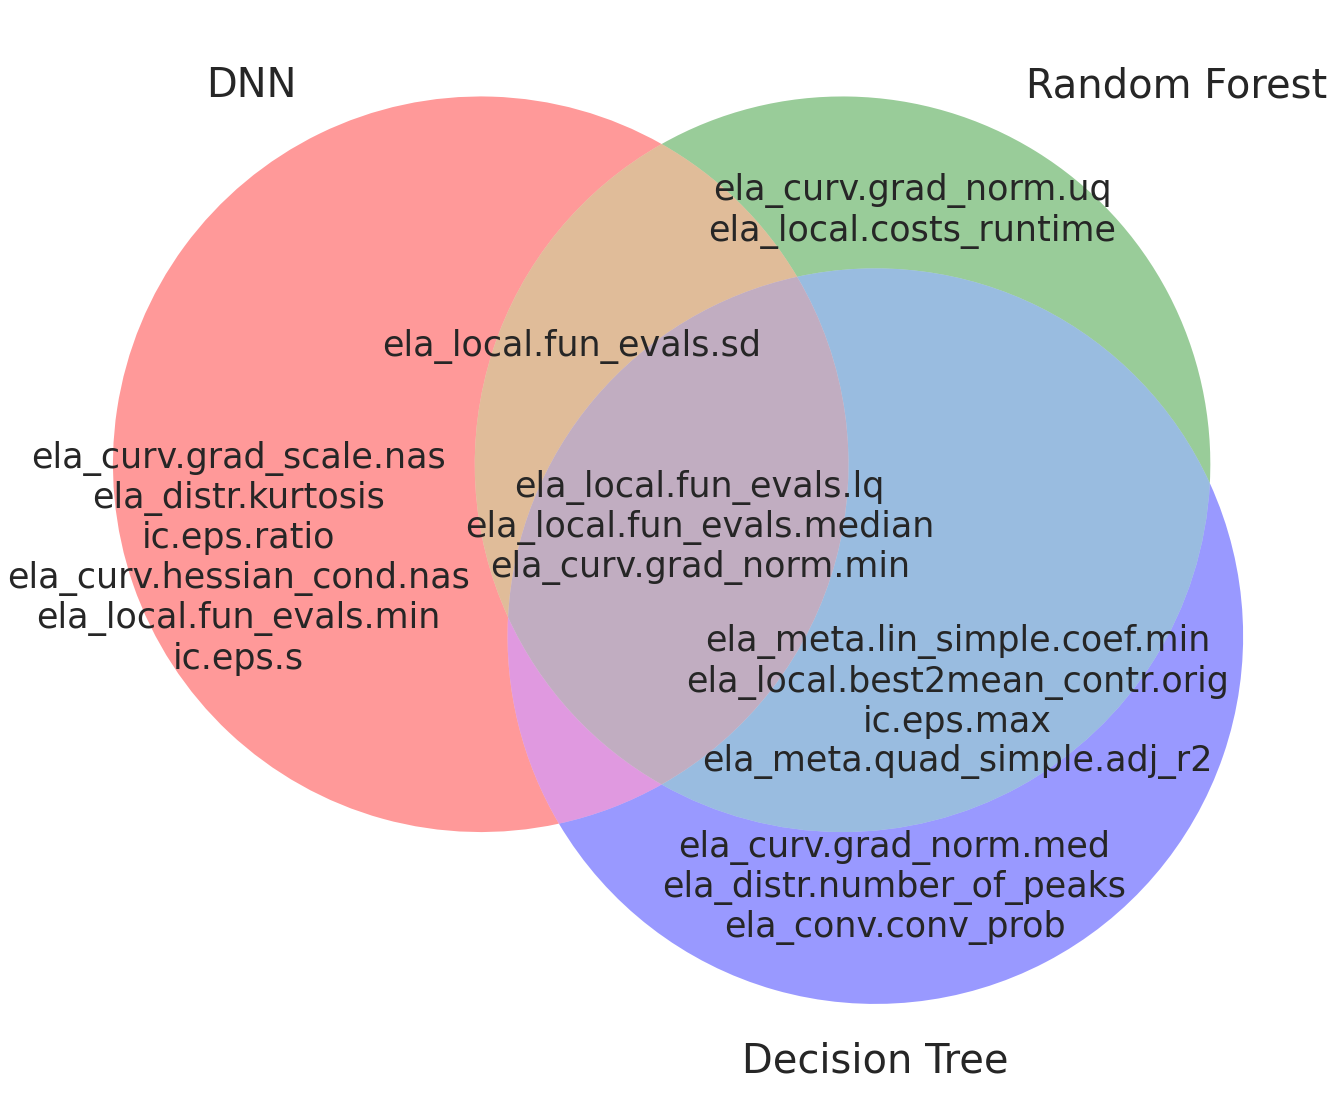

In [ ]:
plt.figure(figsize=(30,20))
v = venn3([A, B, C], set_labels=['DNN', 'Random Forest', 'Decision Tree'])
v.get_label_by_id('100').set_text('\n'.join(A-B-C))
v.get_label_by_id('100').set_fontsize(font_size)
v.get_label_by_id('100').set_x(-0.55)
v.get_label_by_id('100').set_y(-0.04)
v.get_label_by_id('110').set_text('\n'.join(A&B-C))
v.get_label_by_id('110').set_fontsize(font_size)
v.get_label_by_id('011').set_text('\n'.join(B&C-A))
v.get_label_by_id('011').set_fontsize(font_size)
v.get_label_by_id('011').set_y(-0.2)
v.get_label_by_id('011').set_x(0.25)
v.get_label_by_id('001').set_text('\n'.join(C-A-B))
v.get_label_by_id('001').set_fontsize(font_size)
v.get_label_by_id('001').set_x(0.18)
v.get_label_by_id('111').set_text('\n'.join(C&A&B))
v.get_label_by_id('111').set_fontsize(font_size)
v.get_label_by_id('010').set_text('\n'.join(B-A-C))
v.get_label_by_id('010').set_fontsize(font_size)
v.get_label_by_id('010').set_x(0.2)
v.get_label_by_id('101').set_text('\n'.join(A&C-B))
v.get_label_by_id('101').set_fontsize(font_size)

for text in v.set_labels:
    text.set_fontsize(40)
plt.savefig(f'{multi_precision_folder}Multi-output Precision Venn.png', dpi=300, bbox_inches = "tight")

In [ ]:
# plt.savefig(f'{multi_precision_folder}Multi-output Precision Venn.png', dpi=300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

### Multi Log Precision

In [ ]:
feaures_multi_precision = []
for index in shap_multi_log_precision_index:
  label = mean_shaps_df.iloc[index, -1]
  shap_array = mean_shaps_folds_df[mean_shaps_folds_df['Labels'] == label].iloc[:,:-1]
  vals= np.abs(shap_array).mean(0)
  feature_importance = pd.DataFrame(list(zip(mean_shaps_df.columns,vals)),columns=['col_name','feature_importance_vals'])
  feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
  feaures_multi_precision.append(feature_importance.iloc[:10, 0].tolist())

In [ ]:
A = set(feaures_multi_precision[0])
B = set(feaures_multi_precision[1])
C = set(feaures_multi_precision[2])

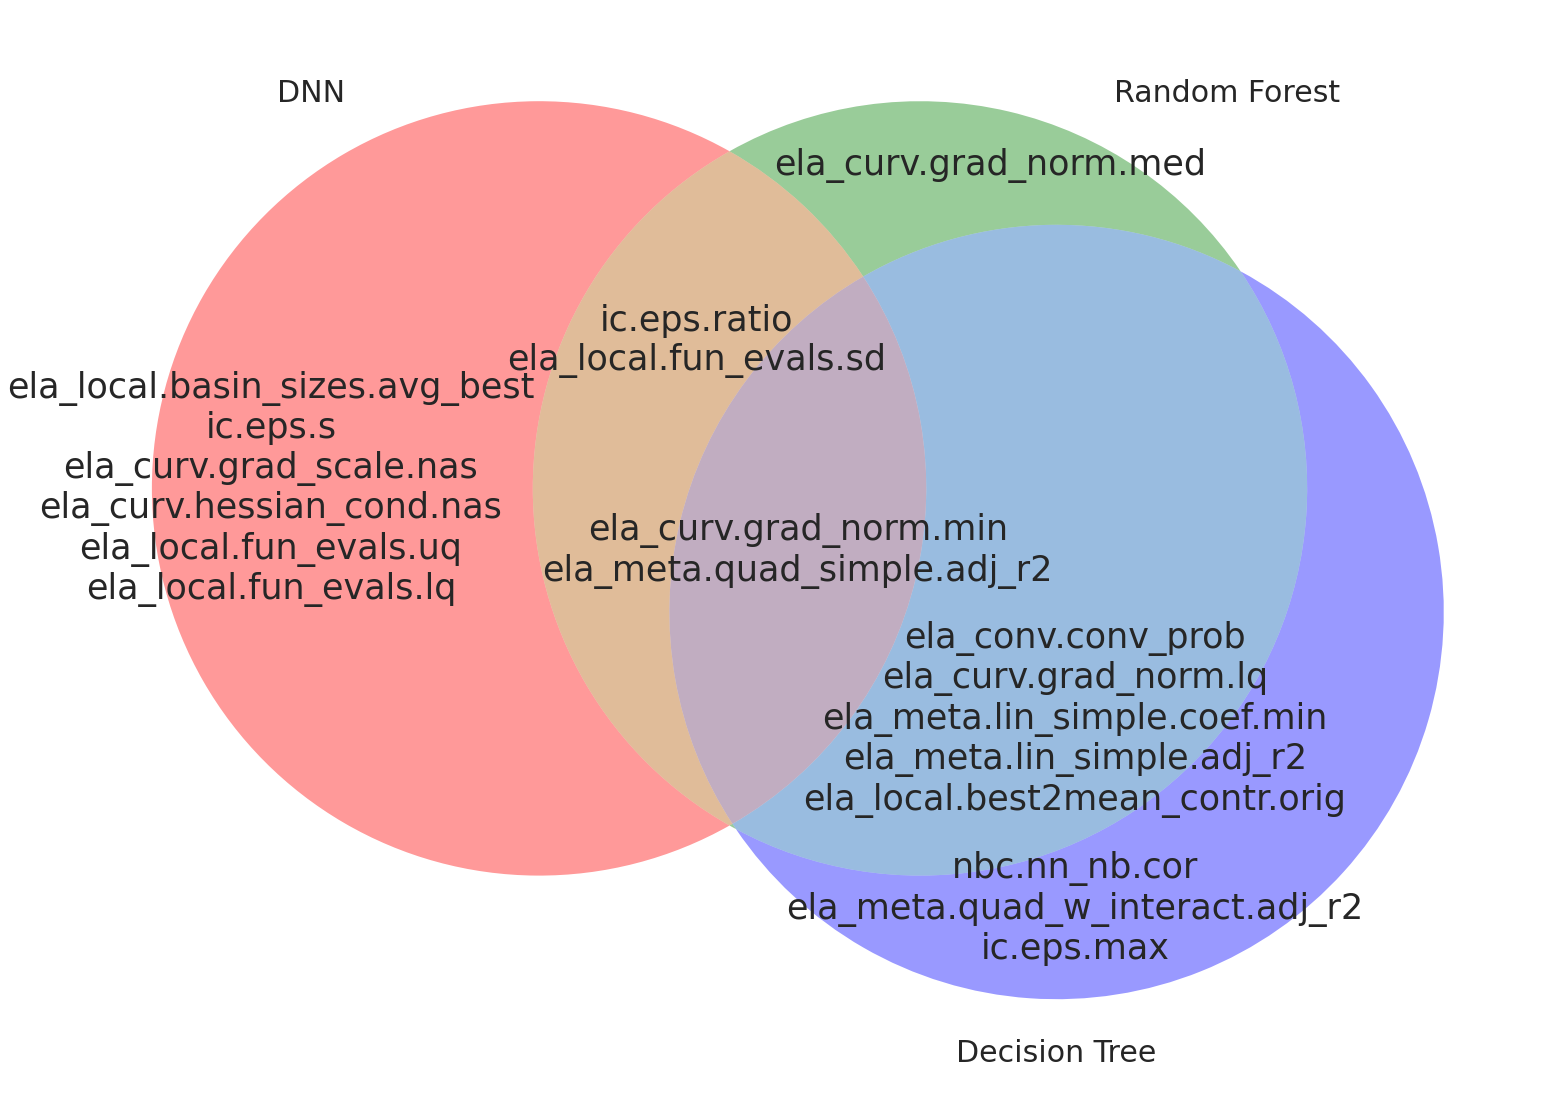

In [ ]:
plt.figure(figsize=(30,20))
v = venn3([A, B, C], set_labels=['DNN', 'Random Forest', 'Decision Tree'])
v.get_label_by_id('100').set_text('\n'.join(A-B-C))
v.get_label_by_id('100').set_fontsize(font_size)
v.get_label_by_id('100').set_x(-0.6)
v.get_label_by_id('110').set_text('\n'.join(A&B-C))
v.get_label_by_id('110').set_fontsize(font_size)
v.get_label_by_id('110').set_y(0.2)
v.get_label_by_id('110').set_x(-0.15)
v.get_label_by_id('011').set_text('\n'.join(B&C-A))
v.get_label_by_id('011').set_fontsize(font_size)
v.get_label_by_id('011').set_x(0.25)
v.get_label_by_id('011').set_y(-0.2)
v.get_label_by_id('001').set_text('\n'.join(C-A-B))
v.get_label_by_id('001').set_fontsize(font_size)
v.get_label_by_id('001').set_x(0.25)
v.get_label_by_id('001').set_y(-0.4)
v.get_label_by_id('001').set_fontsize(font_size)
v.get_label_by_id('111').set_text('\n'.join(C&A&B))
v.get_label_by_id('111').set_fontsize(font_size)
v.get_label_by_id('010').set_text('\n'.join(B-A-C))
v.get_label_by_id('010').set_fontsize(font_size)

for text in v.set_labels:
    text.set_fontsize(30)
plt.savefig(f'{multi_log_precision_folder}Multi-output Log Precision Venn.png', dpi=300, bbox_inches = "tight")

In [ ]:
plt.savefig(f'{multi_log_precision_folder}Multi-output Log Precision Venn.png', dpi=300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

### Single Precision

In [ ]:
feaures_multi_precision = []
for index in shap_single_precision_index:
  label = mean_shaps_df.iloc[index, -1]
  shap_array = mean_shaps_folds_df[mean_shaps_folds_df['Labels'] == label].iloc[:,:-1]
  vals= np.abs(shap_array).mean(0)
  feature_importance = pd.DataFrame(list(zip(mean_shaps_df.columns,vals)),columns=['col_name','feature_importance_vals'])
  feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
  feaures_multi_precision.append(feature_importance.iloc[:10, 0].tolist())

In [ ]:
A = set(feaures_multi_precision[0])
B = set(feaures_multi_precision[1])
C = set(feaures_multi_precision[2])

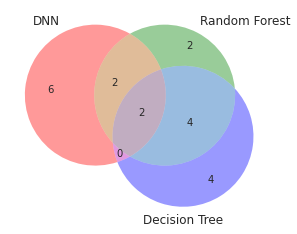

In [ ]:
v = venn3([A, B, C], set_labels=['DNN', 'Random Forest', 'Decision Tree'])

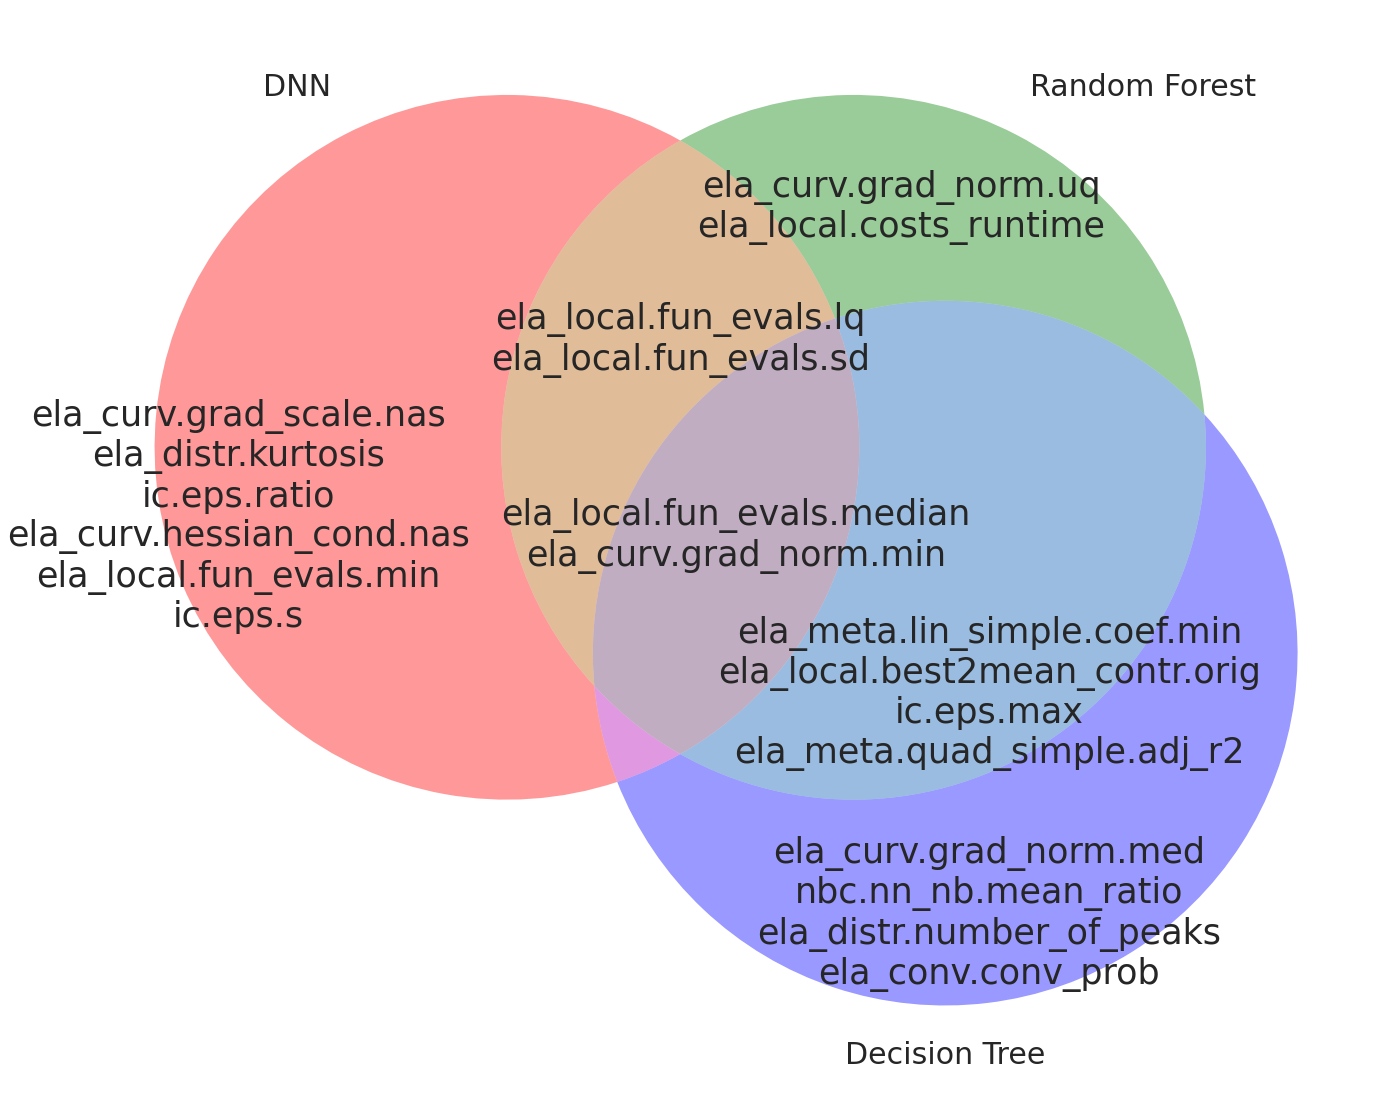

In [ ]:
plt.figure(figsize=(30,20))
v = venn3([A, B, C], set_labels=['DNN', 'Random Forest', 'Decision Tree'])
v.get_label_by_id('100').set_text('\n'.join(A-B-C))
v.get_label_by_id('100').set_fontsize(font_size)
v.get_label_by_id('100').set_x(-0.6)
v.get_label_by_id('100').set_y(-0.)
v.get_label_by_id('110').set_text('\n'.join(A&B-C))
v.get_label_by_id('110').set_fontsize(font_size)
v.get_label_by_id('110').set_y(0.2)
v.get_label_by_id('110').set_x(-0.1)
v.get_label_by_id('011').set_text('\n'.join(B&C-A))
v.get_label_by_id('011').set_fontsize(font_size)
v.get_label_by_id('011').set_x(0.25)
v.get_label_by_id('011').set_y(-0.2)
v.get_label_by_id('001').set_text('\n'.join(C-A-B))
v.get_label_by_id('001').set_fontsize(font_size)
v.get_label_by_id('001').set_x(0.25)
v.get_label_by_id('001').set_y(-0.45)
v.get_label_by_id('111').set_text('\n'.join(C&A&B))
v.get_label_by_id('111').set_fontsize(font_size)
v.get_label_by_id('010').set_text('\n'.join(B-A-C))
v.get_label_by_id('010').set_fontsize(font_size)
v.get_label_by_id('010').set_y(0.35)
v.get_label_by_id('010').set_x(0.15)
v.get_label_by_id('101').set_text('\n'.join(A&C-B))
v.get_label_by_id('101').set_fontsize(font_size)

for text in v.set_labels:
    text.set_fontsize(30)
plt.savefig(f'{single_precision_folder}Single-output Precision Venn.png', dpi=300, bbox_inches = "tight")

In [ ]:
#plt.savefig(f'{single_precision_folder}Single-output Precision Venn.png', dpi=300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

### Single Log Precision

In [ ]:
feaures_multi_precision = []
for index in shap_single_log_precision_index:
  label = mean_shaps_df.iloc[index, -1]
  shap_array = mean_shaps_folds_df[mean_shaps_folds_df['Labels'] == label].iloc[:,:-1]
  vals= np.abs(shap_array).mean(0)
  feature_importance = pd.DataFrame(list(zip(mean_shaps_df.columns[:-1],vals)),columns=['col_name','feature_importance_vals'])
  feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
  feaures_multi_precision.append(feature_importance.iloc[:10, 0].tolist())

In [ ]:
A = set(feaures_multi_precision[0])
B = set(feaures_multi_precision[1])
C = set(feaures_multi_precision[2])

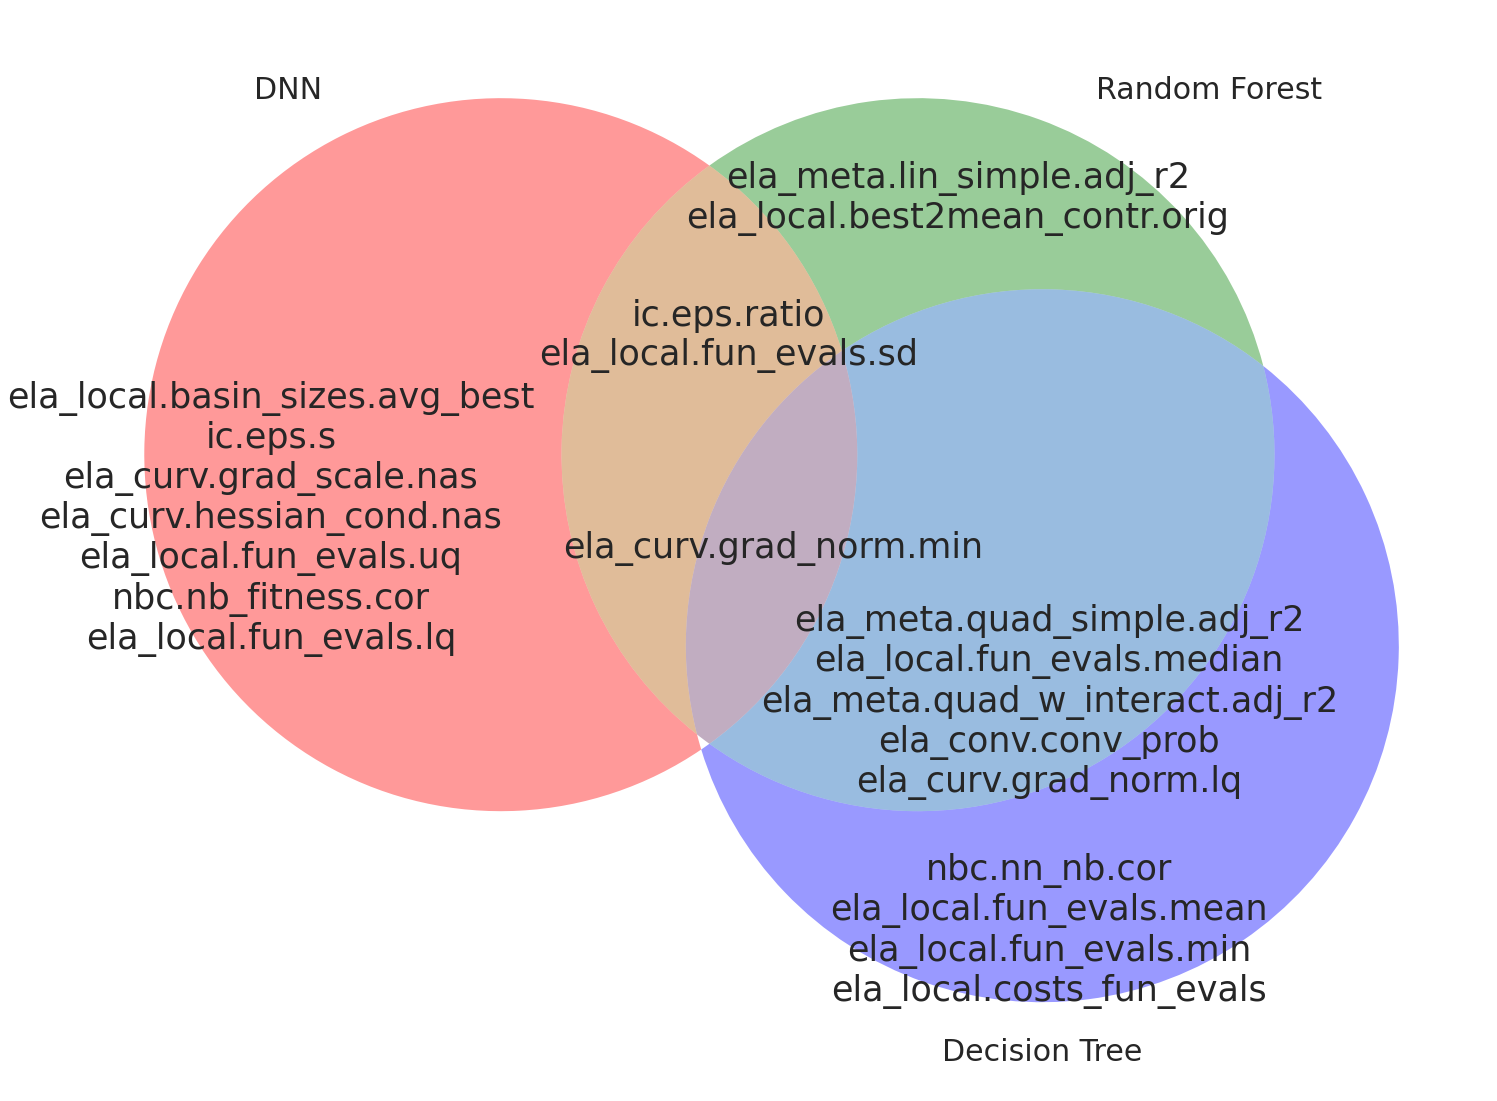

In [ ]:
plt.figure(figsize=(30,20))
v = venn3([A, B, C], set_labels=['DNN', 'Random Forest', 'Decision Tree'])
v.get_label_by_id('100').set_text('\n'.join(A-B-C))
v.get_label_by_id('100').set_fontsize(font_size)
v.get_label_by_id('100').set_x(-0.6)
v.get_label_by_id('100').set_y(-0.)
v.get_label_by_id('110').set_text('\n'.join(A&B-C))
v.get_label_by_id('110').set_fontsize(font_size)
v.get_label_by_id('110').set_y(0.2)
v.get_label_by_id('110').set_x(-0.1)
v.get_label_by_id('011').set_text('\n'.join(B&C-A))
v.get_label_by_id('011').set_fontsize(font_size)
v.get_label_by_id('011').set_x(0.25)
v.get_label_by_id('011').set_y(-0.2)
v.get_label_by_id('001').set_text('\n'.join(C-A-B))
v.get_label_by_id('001').set_fontsize(font_size)
v.get_label_by_id('001').set_x(0.25)
v.get_label_by_id('001').set_y(-0.45)
v.get_label_by_id('111').set_text('\n'.join(C&A&B))
v.get_label_by_id('111').set_fontsize(font_size)
v.get_label_by_id('010').set_text('\n'.join(B-A-C))
v.get_label_by_id('010').set_fontsize(font_size)
v.get_label_by_id('010').set_y(0.35)
v.get_label_by_id('010').set_x(0.15)

for text in v.set_labels:
    text.set_fontsize(30)
plt.savefig(f'{single_log_precision_folder}Single-output Log Precision Venn.png', dpi=300, bbox_inches = "tight")

In [ ]:
plt.savefig(f'{single_log_precision_folder}Single-output Log Precision Venn.png', dpi=300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

## Alg_0_1_2

### Multi

In [ ]:
feaures_multi_precision = []
for index in shap_multi_alg_0_1_2_index:
  label = mean_shaps_alg_0_1_2_df.iloc[index, -1]
  shap_array = mean_shaps_folds_alg_0_1_2_df[mean_shaps_folds_alg_0_1_2_df['Labels'] == label].iloc[:,:-1]
  vals= np.abs(shap_array).mean(0)
  feature_importance = pd.DataFrame(list(zip(mean_shaps_alg_0_1_2_df.columns,vals)),columns=['col_name','feature_importance_vals'])
  feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
  feaures_multi_precision.append(feature_importance.iloc[:10, 0].tolist())

In [ ]:
A = set(feaures_multi_precision[0])
B = set(feaures_multi_precision[1])
C = set(feaures_multi_precision[2])

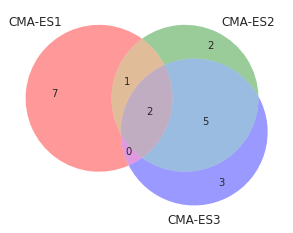

In [ ]:
v = venn3([A, B, C], set_labels=['CMA-ES1', 'CMA-ES2', 'CMA-ES3'])

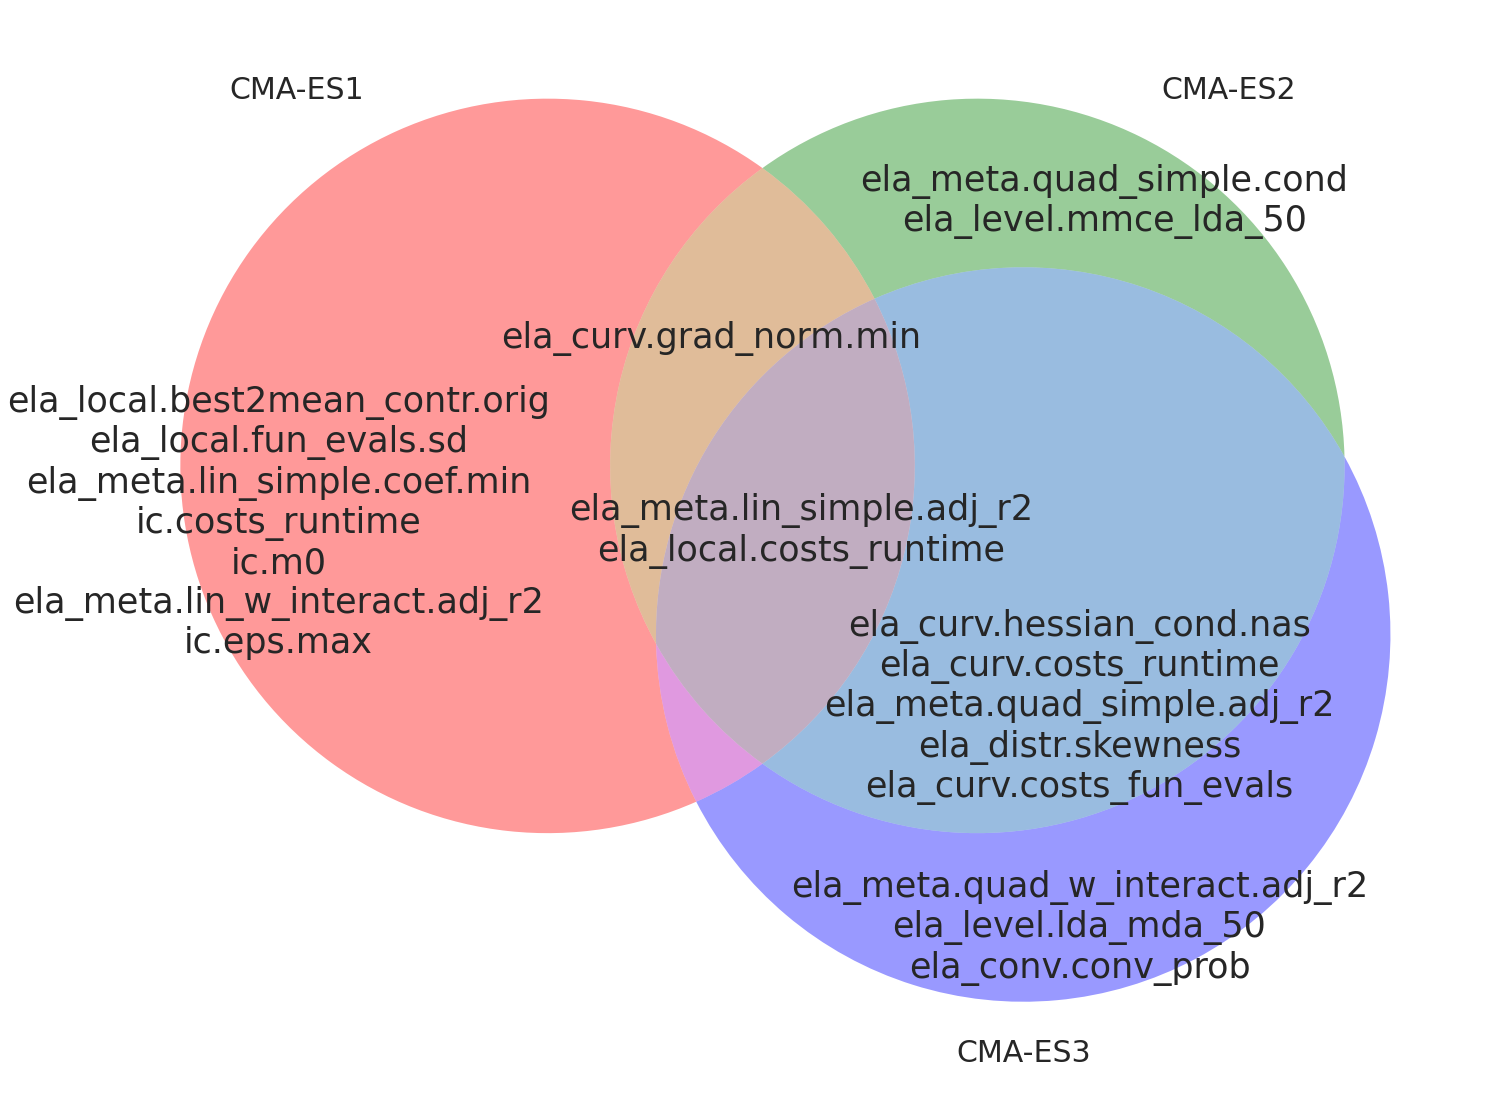

In [ ]:
plt.figure(figsize=(30,20))
v = venn3([A, B, C], set_labels=['CMA-ES1', 'CMA-ES2', 'CMA-ES3'])
v.get_label_by_id('100').set_text('\n'.join(A-B-C))
v.get_label_by_id('100').set_fontsize(font_size)
v.get_label_by_id('100').set_x(-0.62)
v.get_label_by_id('100').set_y(0)
v.get_label_by_id('110').set_text('\n'.join(A&B-C))
v.get_label_by_id('110').set_fontsize(font_size)
v.get_label_by_id('110').set_y(0.2)
v.get_label_by_id('110').set_x(-0.15)
v.get_label_by_id('011').set_text('\n'.join(B&C-A))
v.get_label_by_id('011').set_fontsize(font_size)
v.get_label_by_id('011').set_x(0.25)
v.get_label_by_id('011').set_y(-0.2)
v.get_label_by_id('001').set_text('\n'.join(C-A-B))
v.get_label_by_id('001').set_fontsize(font_size)
v.get_label_by_id('001').set_x(0.25)
v.get_label_by_id('001').set_y(-0.44)
v.get_label_by_id('001').set_fontsize(font_size)
v.get_label_by_id('111').set_text('\n'.join(C&A&B))
v.get_label_by_id('111').set_fontsize(font_size)
v.get_label_by_id('010').set_text('\n'.join(B-A-C))
v.get_label_by_id('010').set_fontsize(font_size)
v.get_label_by_id('101').set_text('\n'.join(A&C-B))
v.get_label_by_id('101').set_fontsize(font_size)

for text in v.set_labels:
    text.set_fontsize(30)
plt.savefig(f'{alg_0_1_2_folder}Multi-output Alg 0 1 and 2.png', dpi=300, bbox_inches = "tight")

In [ ]:
plt.savefig(f'{alg_0_1_2_folder}Multi-output Alg 0 1 and 2.png', dpi=300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

### Single

In [ ]:
feaures_multi_precision = []
for index in shap_single_alg_0_1_2_index:
  label = mean_shaps_alg_0_1_2_df.iloc[index, -1]
  shap_array = mean_shaps_folds_alg_0_1_2_df[mean_shaps_folds_alg_0_1_2_df['Labels'] == label].iloc[:,:-1]
  vals= np.abs(shap_array).mean(0)
  feature_importance = pd.DataFrame(list(zip(mean_shaps_alg_0_1_2_df.columns,vals)),columns=['col_name','feature_importance_vals'])
  feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
  feaures_multi_precision.append(feature_importance.iloc[:10, 0].tolist())

In [ ]:
A = set(feaures_multi_precision[0])
B = set(feaures_multi_precision[1])
C = set(feaures_multi_precision[2])

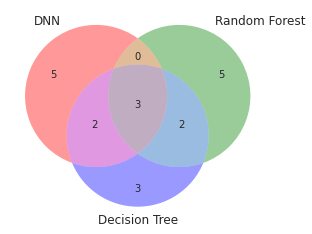

In [ ]:
v = venn3([A, B, C], set_labels=['DNN', 'Random Forest', 'Decision Tree'])

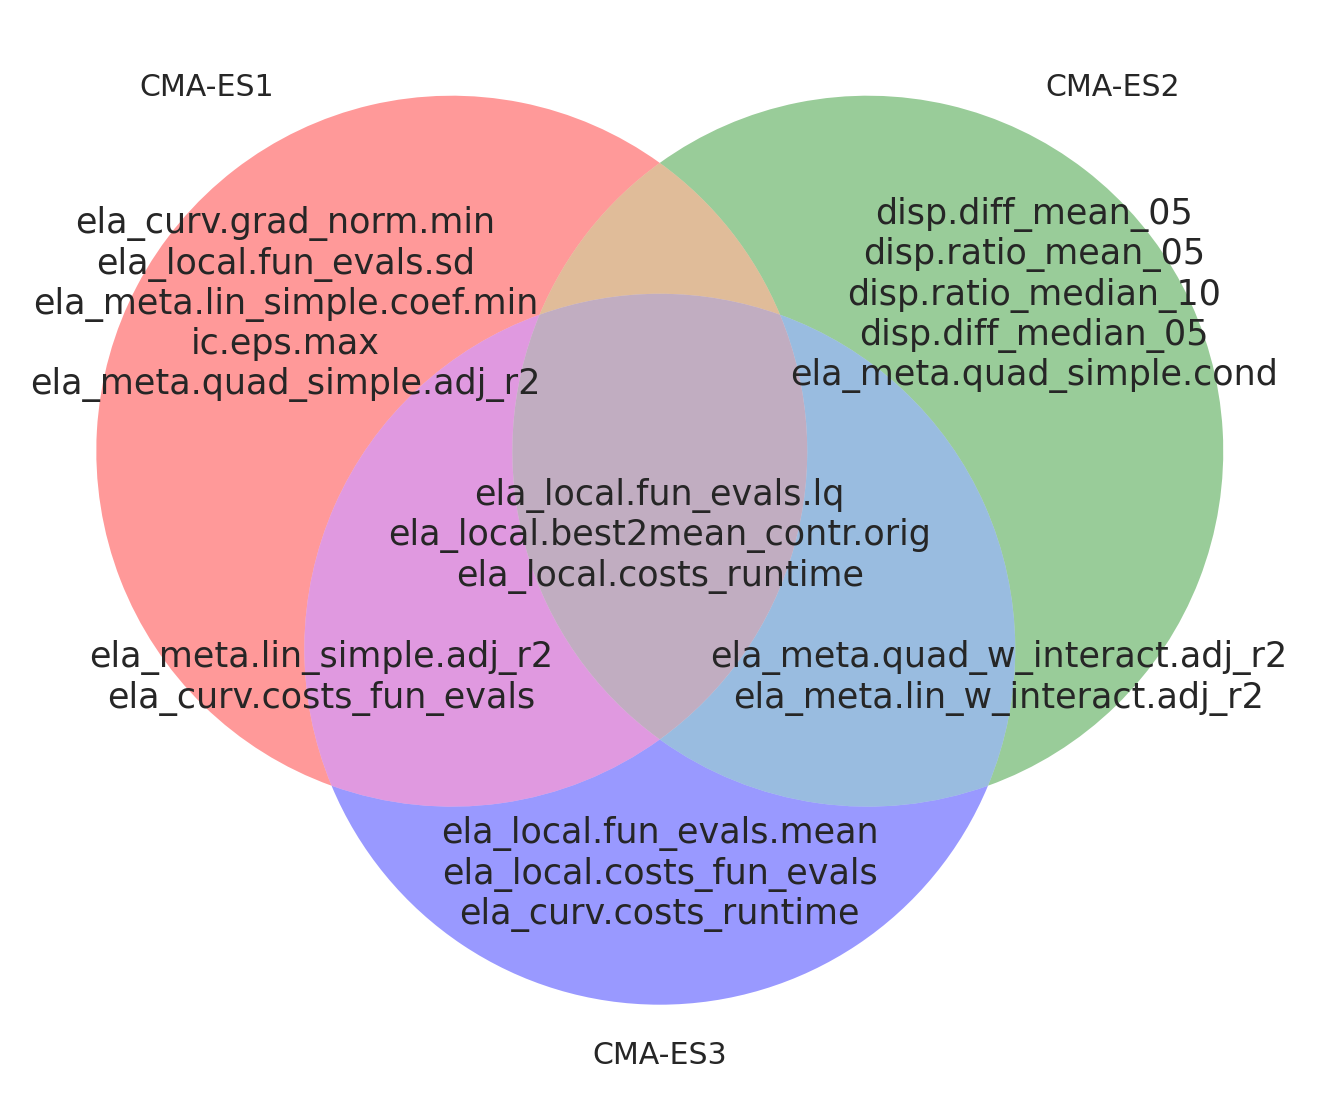

In [ ]:
plt.figure(figsize=(30,20))
v = venn3([A, B, C], set_labels=['CMA-ES1', 'CMA-ES2', 'CMA-ES3'])
v.get_label_by_id('100').set_text('\n'.join(A-B-C))
v.get_label_by_id('100').set_fontsize(font_size)
v.get_label_by_id('100').set_x(-0.42)
v.get_label_by_id('100').set_y(0.24)
v.get_label_by_id('110').set_text('\n'.join(A&B-C))
v.get_label_by_id('110').set_fontsize(font_size)
v.get_label_by_id('110').set_y(0.2)
v.get_label_by_id('110').set_x(-0.15)
v.get_label_by_id('011').set_text('\n'.join(B&C-A))
v.get_label_by_id('011').set_fontsize(font_size)
v.get_label_by_id('011').set_x(0.38)
v.get_label_by_id('011').set_y(-0.18)
v.get_label_by_id('001').set_text('\n'.join(C-A-B))
v.get_label_by_id('001').set_fontsize(font_size)
v.get_label_by_id('001').set_x(0)
v.get_label_by_id('001').set_y(-0.4)
v.get_label_by_id('001').set_fontsize(font_size)
v.get_label_by_id('111').set_text('\n'.join(C&A&B))
v.get_label_by_id('111').set_fontsize(font_size)
v.get_label_by_id('111').set_y(-0.02)
v.get_label_by_id('010').set_text('\n'.join(B-A-C))
v.get_label_by_id('010').set_fontsize(font_size)
v.get_label_by_id('010').set_y(0.25)
v.get_label_by_id('010').set_x(0.42)
v.get_label_by_id('101').set_text('\n'.join(A&C-B))
v.get_label_by_id('101').set_fontsize(font_size)
v.get_label_by_id('101').set_y(-0.18)
v.get_label_by_id('101').set_x(-0.38)

for text in v.set_labels:
    text.set_fontsize(30)
plt.savefig(f'{alg_0_1_2_folder}Single-output Alg 0 1 and 2.png', dpi=300, bbox_inches = "tight")

In [ ]:
plt.savefig(f'{alg_0_1_2_folder}Single-output Alg 0 1 and 2.png', dpi=300, bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

# tSNE

In [ ]:
color = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#ffffff', '#a9a9a9', '#000000', '#dcbeff']
palette = sns.set_palette(color)

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(mean_shaps_folds_df)

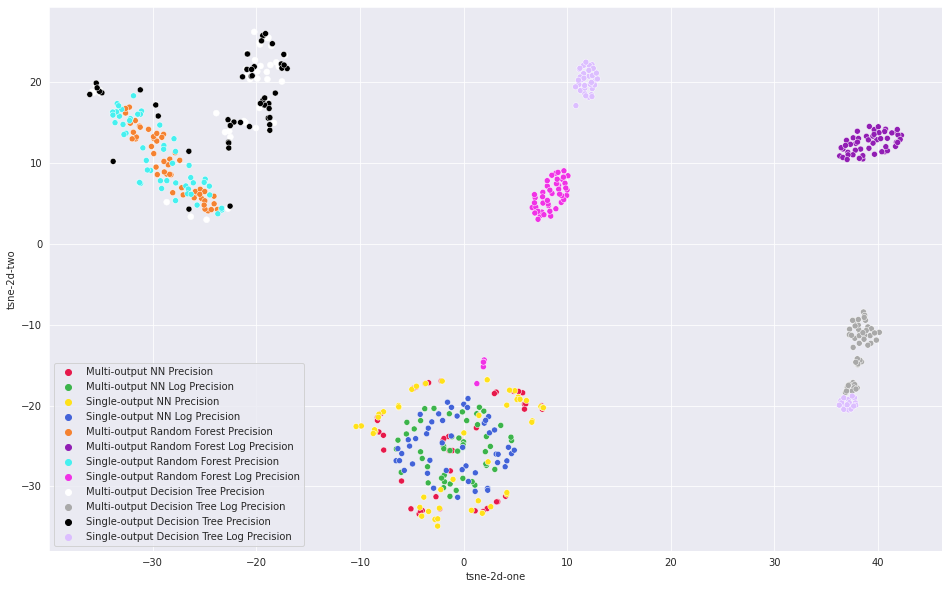

In [ ]:
mean_shaps_folds_df['tsne-2d-one'] = X_2d[:,0]
mean_shaps_folds_df['tsne-2d-two'] = X_2d[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=labels_folds,
    palette=palette,
    data=mean_shaps_folds_df,
    legend="full"
)